### Importing libraries for data processing, visualization and machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Loading and exploring data

In [4]:
df=pd.read_csv("consumer_electronics_sales_data.csv")

In [5]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [7]:
df.isnull().sum()

ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [8]:
df.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


### Data analysis

In [9]:
# Converting categorical columns into numerical ones.

df['ProductCategory'] = LabelEncoder().fit_transform(df['ProductCategory'])
df['ProductBrand'] = LabelEncoder().fit_transform(df['ProductBrand'])

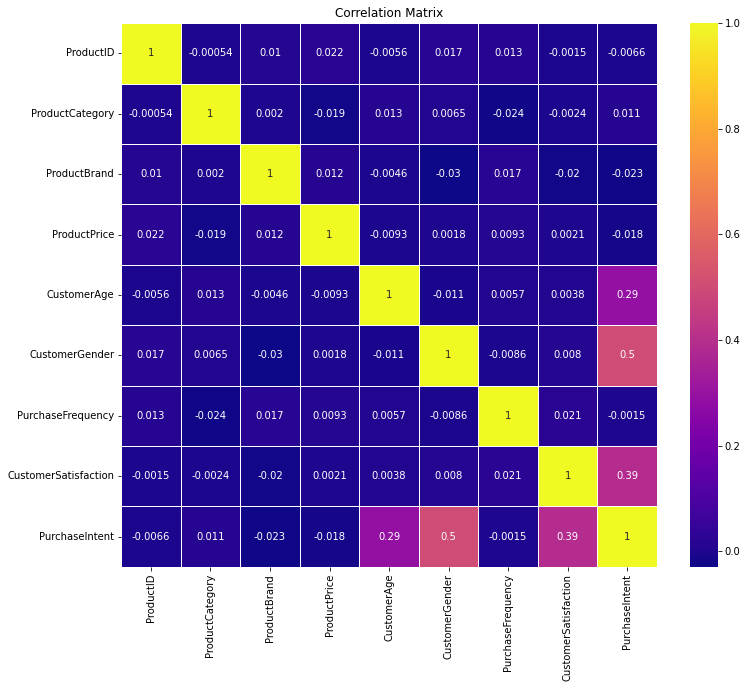

In [24]:
# Correlation matrix - Heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='plasma', linecolor='white', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

### Machine Learning

In [10]:
# Features and labels
# 'ProductID' has no influence on the analysis, so it is removed from X.

X = df.drop(['ProductID', 'PurchaseIntent'], axis=1)
y = df['PurchaseIntent']

In [11]:
# splitting data into train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# data standardization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Training and evaluation - Classification report and confusion matrix.

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       793
           1       0.86      0.88      0.87      1007

    accuracy                           0.85      1800
   macro avg       0.85      0.85      0.85      1800
weighted avg       0.85      0.85      0.85      1800

[[644 149]
 [117 890]]


Model: Random Forest
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       793
           1       0.95      0.97      0.96      1007

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800

[[742  51]
 [ 34 973]]


Model: SVM
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       793
           1       0.93      0.95      0.94      1007

    accuracy                           0.93      1800
   macro avg       